In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web

In [18]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    return pd.DataFrame(closes.loc[:, 'Adj Close'])

ticker = 'AAPL'
start_date = '2017-01-01'
end_date = '2017-12-31'
closes = get_historical_closes(ticker, start_date, end_date)

closes.columns = ['AAPL']
closes

,AAPL
Date,
2017-01-03,111.709831
2017-01-04,111.584778
2017-01-05,112.152229
2017-01-06,113.402542
2017-01-09,114.441246
2017-01-10,114.556656
2017-01-11,115.172195
2017-01-12,114.691307
2017-01-13,114.489334


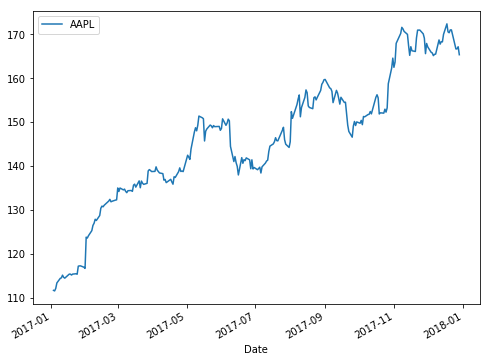

In [20]:
closes.plot(figsize=(8,6));

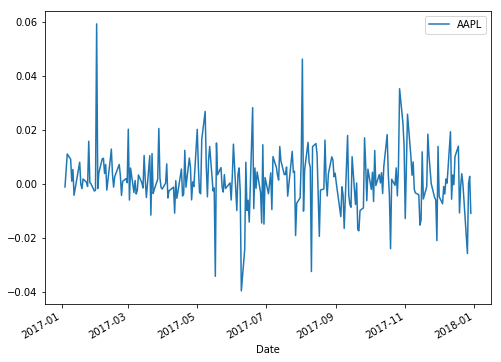

In [21]:
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1)).dropna()
daily_returns = calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [22]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

def daily_ret_sim(mu, sigma, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays, ntraj)+mu, index = dates)

ndays = 360
ntraj = 100
start_date = '2017-01-01'
simret = daily_ret_sim(mu, sigma, ndays, ntraj, start_date)

simret

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,-0.016040,-0.014580,0.013553,-0.009982,-0.005607,0.008169,-0.017329,-0.000471,0.002650,0.010823,...,0.017304,0.018961,0.002876,0.010162,0.001521,0.010431,0.007531,0.008927,-0.000037,0.003770
2017-01-02,0.015262,0.006726,-0.009283,0.025451,-0.012130,-0.004804,0.010581,-0.010023,-0.018130,0.010638,...,-0.005519,0.010613,0.000183,0.005429,0.006646,0.018236,0.007283,0.018709,-0.016645,0.002231
2017-01-03,0.003590,0.003803,-0.009477,0.023006,-0.004778,-0.008357,0.015114,0.016659,0.002899,-0.004751,...,-0.001910,-0.002329,0.015580,-0.003823,0.008940,0.015375,0.001897,-0.000855,0.003933,-0.018912
2017-01-04,-0.009723,0.008107,0.006085,0.010336,-0.002857,0.001568,0.003763,-0.015977,0.022888,0.017758,...,-0.001365,-0.015492,0.002473,0.009482,0.003637,-0.008047,0.011375,0.008267,0.005005,0.016829
2017-01-05,0.012282,-0.011912,-0.004115,0.020503,-0.001438,0.006994,-0.012651,0.008722,-0.005971,0.006886,...,0.012977,0.004600,0.003783,-0.013548,0.006416,-0.001039,0.001648,0.002659,0.013048,0.014927
2017-01-06,0.008071,0.007009,0.005450,0.002377,0.009984,0.007292,0.000062,0.007037,-0.000934,0.001909,...,-0.011071,-0.000214,0.003290,0.013928,-0.000236,0.015019,-0.016084,-0.004772,0.011707,0.004993
2017-01-07,-0.014528,0.001813,0.007899,-0.013458,0.010096,-0.010780,0.002736,0.013893,0.009543,0.003745,...,-0.003063,0.010711,-0.007830,0.004376,-0.015621,-0.000418,0.003723,-0.010308,0.003507,-0.002475
2017-01-08,-0.003268,-0.006163,-0.019446,0.012106,-0.008696,-0.004385,-0.006778,0.001891,0.007181,-0.002968,...,0.002571,0.009007,0.000959,-0.011098,-0.009534,-0.011413,0.015856,0.014011,0.014064,-0.000380
2017-01-09,0.004008,0.015100,0.013037,0.004715,0.009118,-0.011140,-0.014308,0.005896,-0.001474,-0.009608,...,0.012125,-0.018492,-0.002635,0.025032,0.003365,0.012574,0.009711,0.000318,0.007869,0.010067
2017-01-10,0.003307,-0.004190,0.010148,-0.000413,0.000522,0.002572,0.004136,0.002173,-0.003162,-0.009207,...,-0.008629,0.000224,-0.008629,-0.009791,0.001815,0.009681,0.018128,-0.013518,-0.022932,0.000530


In [23]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,162.746498,162.984284,167.634681,163.735431,164.453269,166.734540,162.536856,165.300152,165.816835,167.177677,...,168.264551,168.543613,165.854398,167.067141,165.629701,167.112144,166.628265,166.860900,165.371828,166.002730
2017-01-02,165.249321,164.084166,166.085668,167.956227,162.470522,165.935452,164.265719,163.651679,162.837639,168.965617,...,167.338475,170.341926,165.884716,167.976531,166.734205,170.187628,167.846314,170.012074,162.641960,166.373490
2017-01-03,165.843693,164.709439,164.519061,171.865069,161.696107,164.554484,166.767243,166.400839,163.310408,168.164763,...,167.019196,169.945712,168.489460,167.335583,168.231565,172.824441,168.165070,169.866749,163.282969,163.256558
2017-01-04,164.239060,166.050127,165.523249,173.650617,161.234748,164.812693,167.395901,163.763405,167.091405,171.177640,...,166.791415,167.333147,168.906610,168.929794,168.844472,171.439338,170.088882,171.276804,164.102252,166.027297
2017-01-05,166.268679,164.083930,164.843439,177.247782,161.003023,165.969398,165.291450,165.198024,166.096715,172.360413,...,168.969908,168.104700,169.546752,166.656611,169.931200,171.261369,170.369504,171.732780,166.257558,168.524093
2017-01-06,167.616010,165.237962,165.744236,177.669582,162.618587,167.184096,165.301663,166.364694,165.941583,172.689687,...,167.109579,168.068686,170.105459,168.994027,169.891129,173.852980,167.651178,170.915277,168.215328,169.367691
2017-01-07,165.198546,165.537765,167.058696,175.294593,164.268773,165.391566,165.754570,168.692052,167.532765,173.337598,...,166.598491,169.878551,168.778780,169.735141,167.257830,173.780311,168.276552,169.162455,168.806339,168.949103
2017-01-08,164.659540,164.520677,163.841394,177.429649,162.846511,164.667861,164.634823,169.011415,168.740221,172.823872,...,167.027422,171.415532,168.940701,167.861850,165.670841,171.808150,170.966049,171.549189,171.197234,168.884941
2017-01-09,165.320874,167.023813,165.991313,178.268151,164.338088,162.843560,162.295940,170.010840,168.491670,171.171268,...,169.064875,168.274840,168.496078,172.116773,166.229222,173.982052,172.634436,171.603829,172.549648,170.593776
2017-01-10,165.868577,166.325375,167.684419,178.194561,164.423906,163.262858,162.968578,170.380662,167.959741,169.602591,...,167.612271,168.312578,167.048462,170.439827,166.531285,175.674488,175.792406,169.299781,168.637812,170.684277


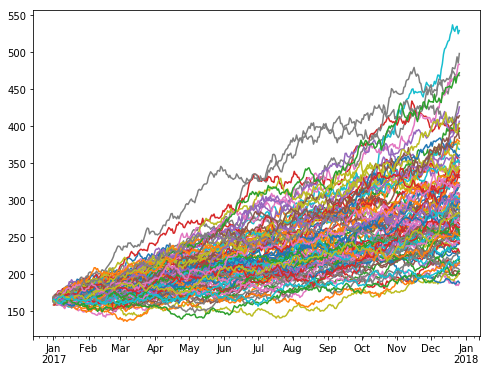

In [24]:
simdata.plot(figsize=(8,6),legend=False);

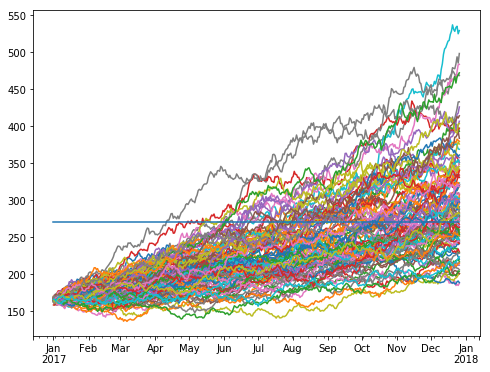

In [25]:
K = 270

dates = pd.date_range('20170101',periods=ndays)
strike = pd.DataFrame({'Strike':K*np.ones(ndays)},index=dates)
simul = pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

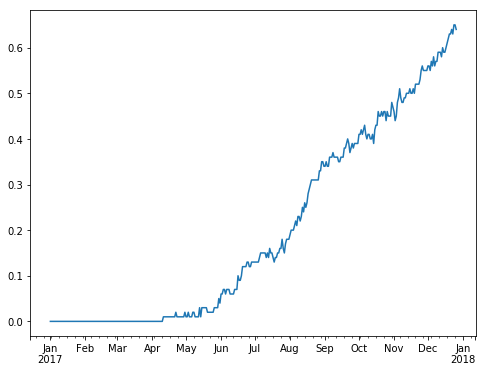

In [26]:
strike = pd.DataFrame(K*np.ones((ndays,ntraj)),index=dates)
count = simdata>strike
prob = count.T.sum()/ntraj
prob.plot(figsize=(8,6),legend=False);

In [27]:
closes.iloc[-1]

AAPL    165.378021
Name: 2017-12-29 00:00:00, dtype: float64

APPLE ES MAS PROBABLE DE GENERAR UN INTERES FAVORABLE